## Titanic dataset processing

```
TD:
Outliereiden tsekkaus
Nullien käsittely, jos yksikään halutuissa sarakkeissa, pois (agessa paljon) -> mallit ilman ikää ja ilman nulleja?
Boxplotit (esim. embarked & age)
median() tuottaa TypeErroria
```

In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression

sns.set_theme(rc={'figure.figsize':(5,4)})

In [10]:
# Whole train dataset

#df = _sqldf.toPandas()

df = pd.read_csv('train.csv', sep=";")

display(df.iloc[:10,:])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


###Descriptions and descriptive visualizations

Shape: (891, 12)

Identifying categorical columns with less than ten levels:
Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]

PassengerId duplicates: 0

Nulls:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

NaN's:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
PassengerId
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: Age, dtype: float64


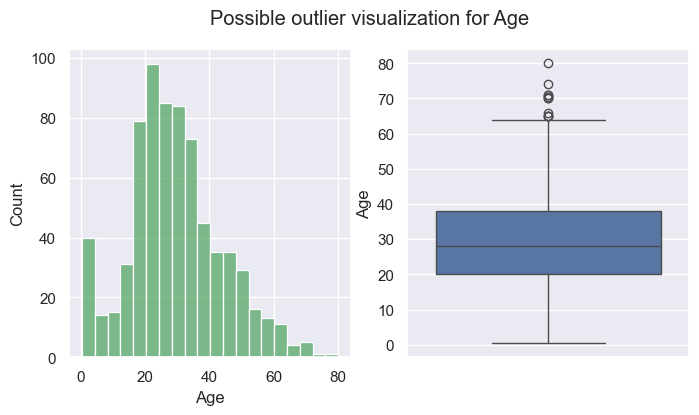

In [72]:
#df = _sqldf.toPandas()

df = pd.read_csv('train.csv', sep=";")

print(f"Shape: {df.shape}\n")
#print(f"Numerical columns:  {df.median().index.values}, non-numerical columns: {df.columns.values[~np.isin(df.columns.values,df.median().index.values)]}\n")

print(f"Identifying categorical columns with less than ten levels:")

categorical = [df[col].nunique() < 10 for col in df.columns]
for col in df[df.columns[categorical]]:
    print(col, df[col].unique())
print()

# Check for PassengerId duplicates:

print(f"PassengerId duplicates: {len(df['PassengerId'])-len(df['PassengerId'].drop_duplicates())}\n")
df = df.set_index('PassengerId', drop=True)

# Nulls per column:
print(f"Nulls:\n{df.isnull().sum()}\n")
print(f"NaN's:\n{df.isna().sum()}")

df["Sex_bool"] = df["Sex"].replace({'male': 0, 'female': 1})

# Deduce column "Deck" from "Cabin":

df["Deck"] = df["Cabin"].str[0]

df = df[['Pclass', 'Name','Sex', 'Sex_bool', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Deck', 'Cabin', 'Embarked', 'Survived']]

# Possible outliers for "Age":

fig, axs = plt.subplots(1, 2, figsize=(8,4))
fig.suptitle("Possible outlier visualization for Age")
sns.histplot(data=df, x="Age", color="g", ax=axs[0])
sns.boxplot(data=df["Age"])

z_scores_abs = np.abs(stats.zscore(df["Age"]))
df_filtered = df[(z_scores_abs < 3).all(axis=1)]

# x = list(df.value_counts("Sex"))
# y1 = df[df["Survived"] == 0].value_counts("Sex").index.to_list()
# y2 = df[df["Survived"] == 1].value_counts("Sex").index.to_list()

# sns:n displotilla helpompi bar-stack?

# plt.bar(y1, x, color="r")
# plt.bar(y2, x, color="b")
# plt.show()


# fig, axs = plt.subplots(2,2, figsize=(10,7))


# axs[0,0].set_title('Histogrammi / miehet')


# plt.bar(x=list(df.value_counts("Sex").index.values), height=df.value_counts("Sex").to_list())
# plt.show()

###Handling missing values

Cabin (and Deck) column has by far the most missing values (687/891, 77 %). As the datatype is str, no median or similar value can be used for filling. These values are (currently) left as-is and not considered as an explanatory variable. Note: predicting deck based on other variables (class?)?

Age also has a significant amount of missing values. For these, the median value for age is used to fill those missing.

Two dataframes are created: *df_age_dropped* drops all rows with missing value for age. *df_age_median* uses the median to fill these as described.



In [ ]:
# Dump:

# Tähän subplot histogrammeja ikä, sukupuoli, luokka, kansi?

#plt.hist(df["Age"], bins=30)
# plt.bar(x=list(df.value_counts("Survived").index.values), height=df.value_counts("Survived").to_list())
# plt.show()

# Seuraavaan voisi laittaa samoja mutta erotella selviytynyt-statuksen perusteella

# Malli:

# 



# axs[0,1].hist(naiset.sort_values()[:195], bins=25, color='r')
# axs[0,1].set_title('Histogrammi / naiset')

# sm.qqplot(miehet, line='q', ax=axs[1,0])
# axs[1,0].set_title('QQ-plot / miehet')

# sm.qqplot(naiset, line='q', markerfacecolor='r', markeredgecolor='r', ax=axs[1,1])
# axs[1,1].set_title('QQ-plot / naiset')

# plt.show()